In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
plt.rcParams['font.family']

['IPAGothic']

In [3]:
sentences = [
    '天皇は、日本国の象徴であり日本国民統合の象徴であって、この地位は、主権の存する日本国民の総意に基く。',
    '皇位は、世襲のものであって、国会の議決した皇室典範の定めるところにより、これを継承する。',
    '天皇の国事に関するすべての行為には、内閣の助言と承認を必要とし、内閣が、その責任を負う。',
    '天皇は、この憲法の定める国事に関する行為のみを行い、国政に関する権能を有しない。',
    '天皇は、法律の定めるところにより、その国事に関する行為を委任することができる。',
    '皇室典範の定めるところにより摂政を置くときは、摂政は、天皇の名でその国事に関する行為を行う。',
    'この場合には、前条第一項の規定を準用する。',
    '天皇は、国会の指名に基いて、内閣総理大臣を任命する。',
    '天皇は、内閣の指名に基いて、最高裁判所の長たる裁判官を任命する。',
    '天皇は、内閣の助言と承認により、国民のために、左の国事に関する行為を行う。',
    '憲法改正、法律、政令及び条約を公布すること。',
    '国会を召集すること。',
    '衆議院を解散すること。',
    '国会議員の総選挙の施行を公示すること。',
    '国務大臣及び法律の定めるその他の官吏の任免並びに全権委任状及び大使及び公使の信任状を認証すること。',
    '大赦、特赦、減刑、刑の執行の免除及び復権を認証すること。',
    '栄典を授与すること。',
    '批准書及び法律の定めるその他の外交文書を認証すること。',
    '外国の大使及び公使を接受すること。',
    '儀式を行うこと。',
    '皇室に財産を譲り渡し、又は皇室が、財産を譲り受け、若しくは賜与することは、国会の議決に基かなければならない。',
]

In [4]:
### 形態素解析 janome
from janome.tokenizer import Tokenizer
janome = Tokenizer()
def ma_sentence(sentence):
    return [{'surface': x.surface, 'pos': x.part_of_speech, 'base_form': x.base_form} for x in janome.tokenize(sentence)]

ma_sentence('菓子を買ってもお金は減らず。')

[{'surface': '菓子', 'pos': '名詞,一般,*,*', 'base_form': '菓子'},
 {'surface': 'を', 'pos': '助詞,格助詞,一般,*', 'base_form': 'を'},
 {'surface': '買っ', 'pos': '動詞,自立,*,*', 'base_form': '買う'},
 {'surface': 'て', 'pos': '助詞,接続助詞,*,*', 'base_form': 'て'},
 {'surface': 'も', 'pos': '助詞,係助詞,*,*', 'base_form': 'も'},
 {'surface': 'お金', 'pos': '名詞,一般,*,*', 'base_form': 'お金'},
 {'surface': 'は', 'pos': '助詞,係助詞,*,*', 'base_form': 'は'},
 {'surface': '減ら', 'pos': '動詞,自立,*,*', 'base_form': '減る'},
 {'surface': 'ず', 'pos': '助動詞,*,*,*', 'base_form': 'ぬ'},
 {'surface': '。', 'pos': '記号,句点,*,*', 'base_form': '。'}]

In [ ]:
### 形態素解析 MeCab
import MeCab
mecab = MeCab.Tagger('-Ochasen')
def ma_sentence(sentence):
    mors = [x.split('\t') for x in mecab.parse(sentence).split('\n')]
    return [{'surface': mor[0], 'pos': mor[3], 'base_form': mor[2]} for mor in mors if len(mor) > 2]

ma_sentence('菓子を買ってもお金は減らず。')

In [5]:
mors_list = [ma_sentence(sentence) for sentence in sentences]
print(mors_list[0][0:5])
print(mors_list[-1])

[{'surface': '天皇', 'pos': '名詞,一般,*,*', 'base_form': '天皇'}, {'surface': 'は', 'pos': '助詞,係助詞,*,*', 'base_form': 'は'}, {'surface': '、', 'pos': '記号,読点,*,*', 'base_form': '、'}, {'surface': '日本', 'pos': '名詞,固有名詞,地域,国', 'base_form': '日本'}, {'surface': '国', 'pos': '名詞,接尾,一般,*', 'base_form': '国'}]
[{'surface': '皇室', 'pos': '名詞,一般,*,*', 'base_form': '皇室'}, {'surface': 'に', 'pos': '助詞,格助詞,一般,*', 'base_form': 'に'}, {'surface': '財産', 'pos': '名詞,一般,*,*', 'base_form': '財産'}, {'surface': 'を', 'pos': '助詞,格助詞,一般,*', 'base_form': 'を'}, {'surface': '譲り渡し', 'pos': '動詞,自立,*,*', 'base_form': '譲り渡す'}, {'surface': '、', 'pos': '記号,読点,*,*', 'base_form': '、'}, {'surface': '又は', 'pos': '接続詞,*,*,*', 'base_form': '又は'}, {'surface': '皇室', 'pos': '名詞,一般,*,*', 'base_form': '皇室'}, {'surface': 'が', 'pos': '助詞,格助詞,一般,*', 'base_form': 'が'}, {'surface': '、', 'pos': '記号,読点,*,*', 'base_form': '、'}, {'surface': '財産', 'pos': '名詞,一般,*,*', 'base_form': '財産'}, {'surface': 'を', 'pos': '助詞,格助詞,一般,*', 'base_form': 'を'}, {'surface': '

In [6]:
# ワードのリストを作成
import re
words_list = [{mor['surface'] for mor in mors if re.match('名詞(?!.*(代名詞|接尾|非自立))', mor['pos'])} for mors in mors_list]
print(words_list[0])

{'統合', '日本', '地位', '国民', '象徴', '天皇', '総意', '主権'}


In [7]:
# ワードの頻度
import collections
all_words = [x for row in words_list  for x in row]
ct_word = collections.Counter(all_words)
print(ct_word.most_common()[:5])

[('天皇', 8), ('国会', 5), ('国事', 5), ('行為', 5), ('内閣', 4)]


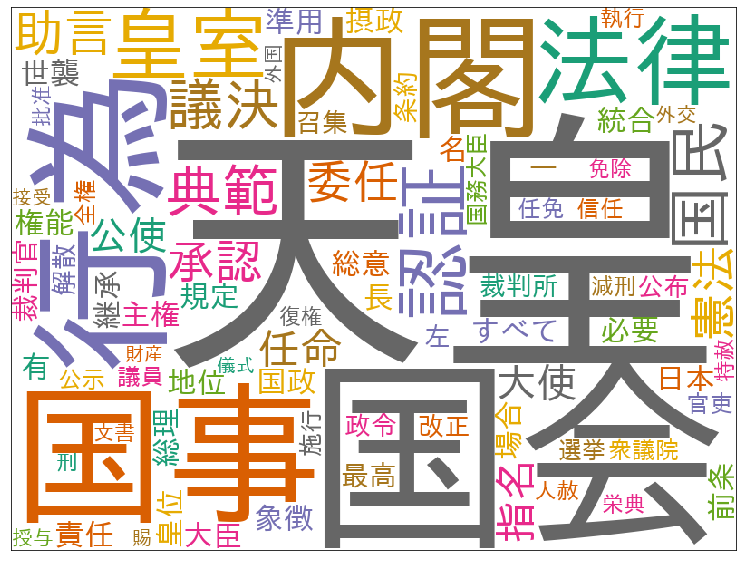

In [8]:
wordcloud = WordCloud(font_path='/usr/share/fonts/ipa-gothic/ipag.ttf',
                     background_color="white", width=800, height=600,
                     collocations=False, colormap='Dark2', random_state=0)
wordcloud.generate_from_frequencies(ct_word)

fix, ax = plt.subplots(1, 1, figsize=(15,10))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.imshow(wordcloud)

font_path の設定例
- Google Colaboratory: ```/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf```
  - 事前に ```!apt-get -y install fonts-ipafont-gothic``` を実行
- Windows: ```C:/Windows/Fonts/HGRSGU.TTC```
- MacOS: ```/Library/Fonts/Arial Unicode.ttf```
- Linux: ```/usr/share/fonts/ipa-gothic/ipag.ttf```
  - インストールする場合は ```python matplotlib 日本語``` でウェブ検索
  - fc-list コマンドでパスを確認できるのでそれを指定